## The Goal of this project is to classify different languages (Seventeen). The data set is taken from kaggle. The final data set is a combination of two data sets.

https://www.kaggle.com/datasets/basilb2s/language-detection

https://www.kaggle.com/datasets/ayushmi77al/hindicsv



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


In [2]:
df = pd.read_csv('Language Detection.csv')


In [3]:
df.shape

(10337, 2)

In [4]:
df['Language'].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

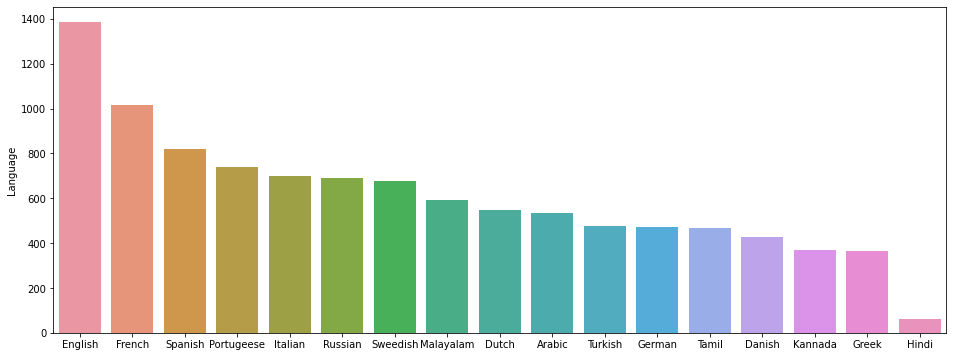

In [5]:
value =df['Language'].value_counts()
plt.figure(figsize=(16,6))
sns.barplot(x=value.index,y=value)

## The data set has very less hindi sentences so I will adding an hindi data set from kaggle to this data set 

In [6]:
df1 = pd.read_csv('hindi.csv')

In [7]:
data = df.append(df1,ignore_index=True)

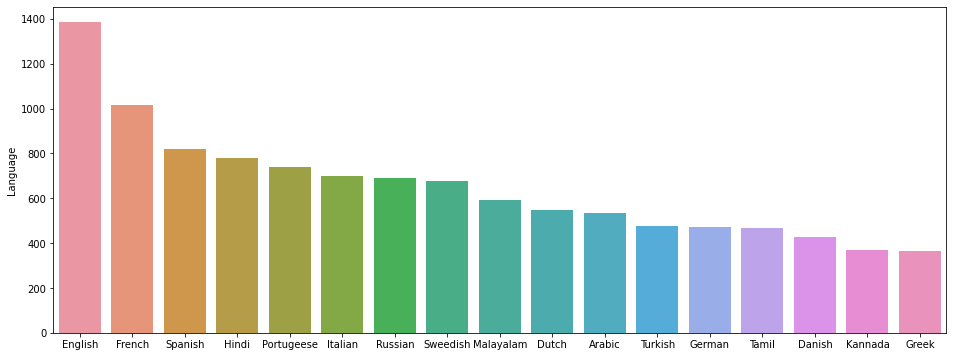

In [8]:
value =data['Language'].value_counts()
plt.figure(figsize=(16,6))
sns.barplot(x=value.index,y=value)

In [9]:
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


## This seems a good  data set for analysis and model building


#Text Preprocessing

In [10]:

import warnings
warnings.filterwarnings('ignore')
import string

In [11]:
data['Text']=data['Text'].apply(lambda x : x.translate(str.maketrans('', '', string.punctuation)))

In [12]:
data.head()

,Text,Language
0,Nature in the broadest sense is the natural p...,English
1,Nature can refer to the phenomena of the physi...,English
2,The study of nature is a large if not the only...,English
3,Although humans are part of nature human activ...,English
4,1 The word nature is borrowed from the Old Fre...,English


# Model building

In [13]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [14]:
model =Pipeline([('Vector', CountVectorizer()), ('MB', MultinomialNB())])


In [15]:
x =np.array(data['Text'])
y =np.array(data['Language'])

In [16]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

In [17]:
model.fit(X_train,y_train)

Pipeline(steps=[('Vector', CountVectorizer()), ('MB', MultinomialNB())])

In [18]:
model.score(X_test,y_test)

0.9761578514661551

In [19]:
print(model.predict(["Возникающие при этом задачи прогнозирования, у"]))
print(model.predict(["ಒಪ್ಪುವುದು ಮತ್ತು ಒಪ್ಪುವುದಿಲ್ಲ."]))
print(model.predict(["देखकर अच्छा लगता है"]))

['Russian']
['Kannada']
['Hindi']
